In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# TASK 3 Linear regression

Нахил (m): 0.5347432024169183
Вільний член (b): 2.19939577039275


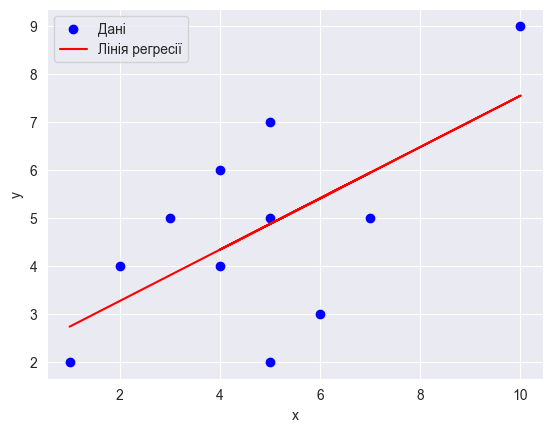

In [22]:

# Придумуємо дані
# Наприклад, ми маємо деякі точки (x, y)
x = np.array([1, 2, 3, 4, 5,10,5,6,7,4,5])
y = np.array([2, 4, 5, 4, 5,9,2,3,5,6,7])

# Розрахунок коефіцієнтів лінійної регресії
# y = mx + b

# Середні значення x і y
x_mean = np.mean(x)
y_mean = np.mean(y)

# Обчислення чисельника і знаменника для m (нахил)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)

# Нахил лінії регресії
m = numerator / denominator

# Вільний член (b)
b = y_mean - m * x_mean

print(f"Нахил (m): {m}")
print(f"Вільний член (b): {b}")

# Прогнозовані значення y
y_pred = m * x + b

# Візуалізація
plt.scatter(x, y, color='blue', label='Дані')
plt.plot(x, y_pred, color='red', label='Лінія регресії')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# TASK 4 Binary classification with DT

Початкова ентропія: 1.0


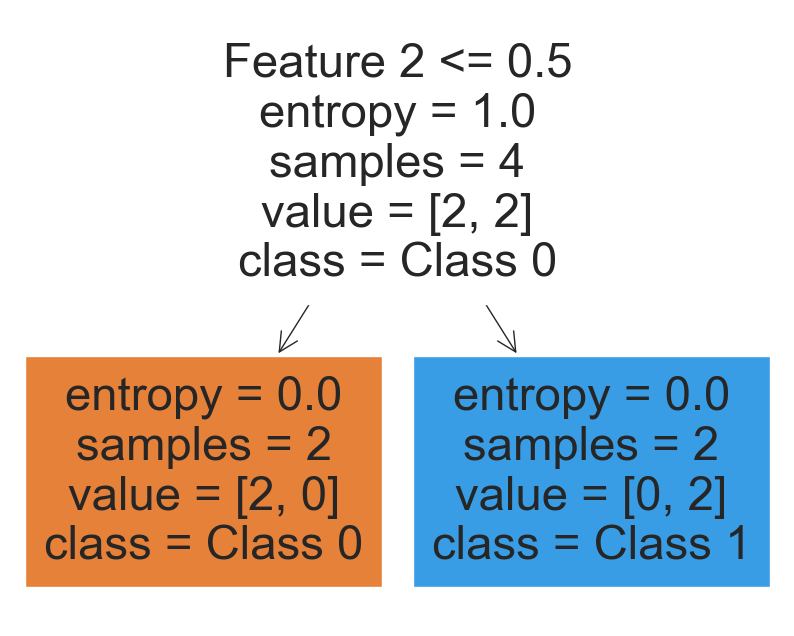

In [23]:

# Придумуємо дані
X = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
y = np.array([0, 1, 0, 1])

# Ініціалізація та навчання моделі дерева рішень
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1) # max_depth=1 для обчислення ентропії на одному кроці
clf.fit(X, y)

# Функція для обчислення ентропії
def entropy(p):
    return -p * np.log2(p) if p != 0 else 0

# Обчислення ентропії для поточного розбиття
def calculate_entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    total_count = len(y)
    ent = sum(entropy(count/total_count) for count in counts)
    return ent

# Обчислення ентропії для початкового набору даних
initial_entropy = calculate_entropy(y)
print(f"Початкова ентропія: {initial_entropy}")

# Побудова та візуалізація дерева рішень
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.show()

# Task 5: Classification with KNN

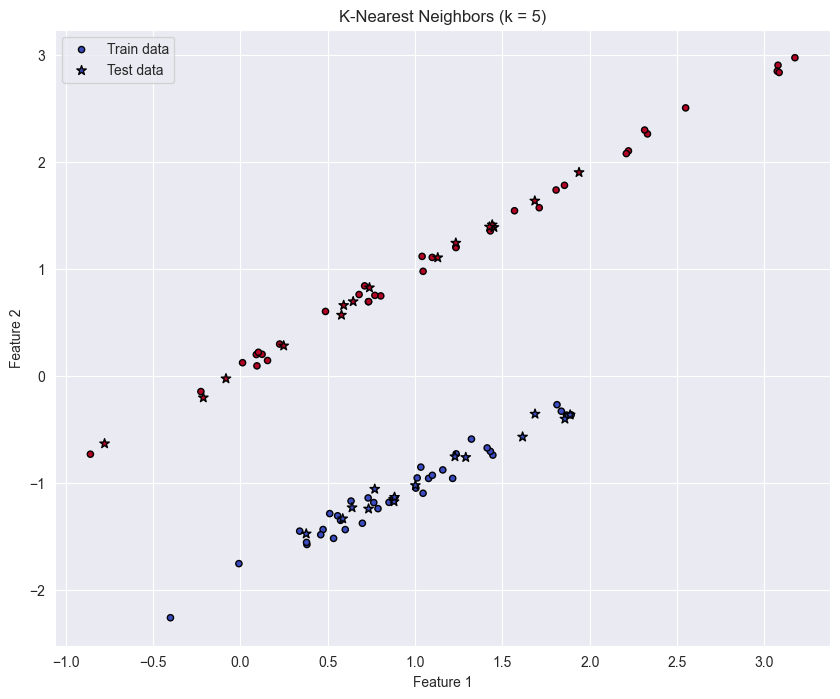

In [24]:

# Створюємо набір даних
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Розділяємо дані на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ініціалізація моделі KNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Передбачення на тестових даних
y_pred = knn.predict(X_test)

# Візуалізація результатів
plt.figure(figsize=(10, 8))

# Наносимо точки тренувальної вибірки
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=20, label='Train data')
# Наносимо точки тестової вибірки
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=50, marker='*', label='Test data')

plt.title(f"K-Nearest Neighbors (k = {k})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Task 6: Clustering

K-means

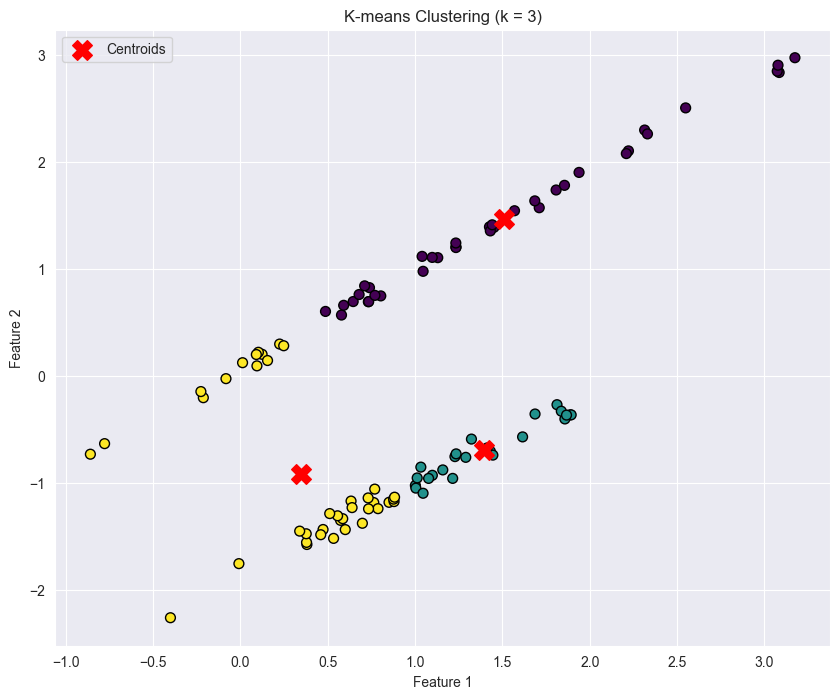

In [25]:

# Створюємо набір даних
X, _ = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Ініціалізація моделі K-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Передбачення кластерів для даних
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# Візуалізація результатів
plt.figure(figsize=(10, 8))

# Наносимо точки, позначені за кластерами
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
# Наносимо центроїди кластерів
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title(f"K-means Clustering (k = {k})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

DBSCAN

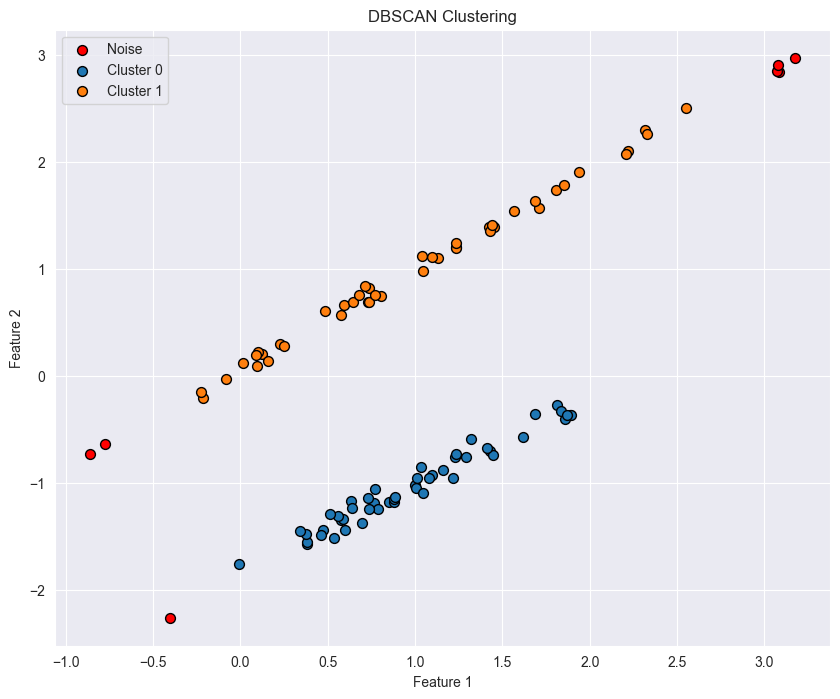

In [26]:

# Створюємо набір даних
X, _ = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Ініціалізація моделі DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Візуалізація результатів
plt.figure(figsize=(10, 8))

# Наносимо точки, позначені за кластерами
unique_labels = np.unique(labels)
for label in unique_labels:
    if label == -1:
        # Шумні точки
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c='red', edgecolor='k', s=50, label='Noise')
    else:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], edgecolor='k', s=50, label=f'Cluster {label}')

plt.title("DBSCAN Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()